## <font color='#eb3483'>Predicting Gas Consumption </font>

In this exercise we are going to build a regression model. We are going to predict consumption in miles per gallon using the numerical values in the dataset `vehicles.1.initial_process.csv`. 

In [16]:
from IPython.display import Image
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

import seaborn as sns
sns.set(rc={'figure.figsize':(6,5)}) 
import warnings
warnings.simplefilter("ignore")

Load the data and select the numerical columns and replace their missing values with 0

In [11]:
vehicles = pd.read_csv("data/vehicles.1.initial_process.csv")
vehicles = vehicles.drop(['drive', 'fuel', 'make', 'model', 'transmission', 'vehicle_class', 'year'], axis = "columns")
vehicles = vehicles.fillna(0)
vehicles

,co2,consumption_mpg,cylinders,displacement
0,423.190476,21,4.0,2.0
1,807.909091,11,12.0,4.9
2,329.148148,27,4.0,2.2
3,807.909091,11,8.0,5.2
4,467.736842,19,4.0,2.2
...,...,...,...,...
39860,403.954545,22,4.0,2.2
39861,386.391304,23,4.0,2.2
39862,423.190476,21,4.0,2.2
39863,423.190476,21,4.0,2.2


Build the regression model and print out the test set targets and predictions.

In [14]:
from sklearn.model_selection import train_test_split
X = vehicles[['co2', 'cylinders', 'displacement']]
#not dependent on just one thing
y = vehicles["consumption_mpg"]                 # numpy array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
model = LinearRegression()
model.fit(X = X_train, y = y_train)
predictions = model.predict(X_test)
for y, y_pred in list(zip(y_test, predictions))[:10]:
    print("Real value: {:.3f} Estimated value: {:.5f}".format(y, y_pred))

Real value: 15.000 Estimated value: 14.33653
Real value: 14.000 Estimated value: 12.84245
Real value: 25.000 Estimated value: 25.95688
Real value: 19.000 Estimated value: 20.51410
Real value: 20.000 Estimated value: 21.93575
Real value: 16.000 Estimated value: 16.40316
Real value: 28.000 Estimated value: 27.53677
Real value: 19.000 Estimated value: 20.49429
Real value: 17.000 Estimated value: 18.24776
Real value: 19.000 Estimated value: 20.03410


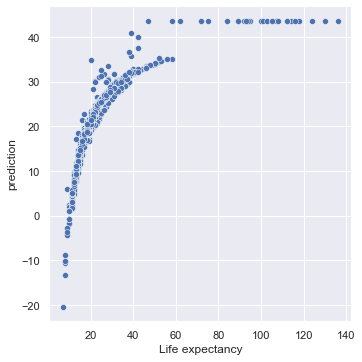

In [23]:
X = X_test.reset_index().copy() # make a copy of indices and data
X["Life expectancy"] = y_test.tolist()
X["prediction"] = predictions
sns.relplot(x="Life expectancy", y ="prediction", data=X, kind="scatter")